In [1]:
%matplotlib inline

# Import used libraries
import numpy
import pandas
import matplotlib.pyplot as plt
from ebin import TitanicClassifier

Using TensorFlow backend.


/Users/jani/anaconda/envs/kakkostensor/lib/python2.7/site-packages/pandas/core/common.py:328: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


                PassengerId  Survived      Pclass         Sex         Age  \
Survived                                                                    
0        count   424.000000       424  424.000000  424.000000  424.000000   
         mean    442.299528         0    2.485849    1.150943   30.626179   
         std     264.739548         0    0.743633    0.358417   14.172110   
         min       1.000000         0    1.000000    1.000000    1.000000   
         25%     200.750000         0    2.000000    1.000000   21.000000   
         50%     436.000000         0    3.000000    1.000000   28.000000   
         75%     683.250000         0    3.000000    1.000000   39.000000   
         max     891.000000         0    3.000000    2.000000   74.000000   
1        count   290.000000       290  290.000000  290.000000  290.000000   
         mean    457.768966         1    1.872414    1.679310   28.343690   
         std     250.845515         0    0.836617    0.467548   14.950952   

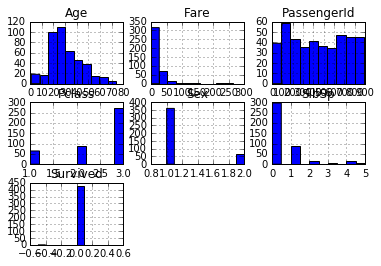

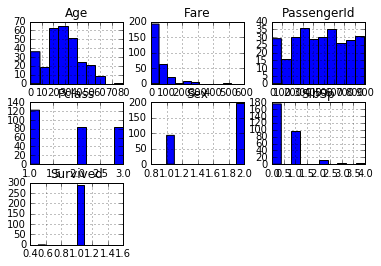

In [2]:
# Get descriptive stats
classifier = TitanicClassifier()
classifier.load_train_data()
classifier.descriptive_statistics()

In [3]:
# Train the classifier
classifier.train()

# load test data
testData = pandas.read_csv(
    "data/test.csv", header=0, usecols=[0, 1, 3, 4, 5, 8])

passengerIds = testData.filter(items=['PassengerId']).values[1:]
testData = testData.filter(items=['Pclass', 'Sex', 'Age', 'SibSp', 'Fare'])

testData = testData.replace(to_replace='male', value=1)
testData = testData.replace(to_replace='female', value=2)

#print testData

# Slice the test data without column labels
testData = testData.values[1:].astype(float)
results = classifier.model.predict(testData)

#print results

Epoch 1/2048
0s - loss: 0.6573 - acc: 0.6339
Epoch 2/2048
0s - loss: 0.6175 - acc: 0.6760
Epoch 3/2048
0s - loss: 0.6088 - acc: 0.6957
Epoch 4/2048
0s - loss: 0.6043 - acc: 0.6830
Epoch 5/2048
0s - loss: 0.5987 - acc: 0.6872
Epoch 6/2048
0s - loss: 0.5904 - acc: 0.6928
Epoch 7/2048
0s - loss: 0.5839 - acc: 0.7097
Epoch 8/2048
0s - loss: 0.5828 - acc: 0.7013
Epoch 9/2048
0s - loss: 0.5676 - acc: 0.7363
Epoch 10/2048
0s - loss: 0.5494 - acc: 0.7251
Epoch 11/2048
0s - loss: 0.5274 - acc: 0.7532
Epoch 12/2048
0s - loss: 0.5223 - acc: 0.7714
Epoch 13/2048
0s - loss: 0.5174 - acc: 0.7588
Epoch 14/2048
0s - loss: 0.4991 - acc: 0.7798
Epoch 15/2048
0s - loss: 0.4764 - acc: 0.7896
Epoch 16/2048
0s - loss: 0.4857 - acc: 0.7812
Epoch 17/2048
0s - loss: 0.4708 - acc: 0.8008
Epoch 18/2048
0s - loss: 0.4621 - acc: 0.8022
Epoch 19/2048
0s - loss: 0.4605 - acc: 0.8008
Epoch 20/2048
0s - loss: 0.4567 - acc: 0.8065
Epoch 21/2048
0s - loss: 0.4537 - acc: 0.7980
Epoch 22/2048
0s - loss: 0.4598 - acc: 0.80

In [14]:
# Save results to .csv
mapped_results = numpy.zeros((passengerIds.shape[0], 2), dtype=numpy.int32)

#print mapped_results.shape, results.shape, passengerIds.shape[0]

# Map passengerid to prediction
for index in xrange(passengerIds.shape[0]):
    mapped_results[index, 0] = int(passengerIds[index])
    mapped_results[index, 1] = int(numpy.rint(results[index, 0]-0.45))
    
#print mapped_results

# Save to csv
df_results = pandas.DataFrame(data=mapped_results, index=None, columns=['PassengerId', 'Survived'])
df_results.to_csv('results.csv', sep=',', index=None)